# Perceptron

# Q.4

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns


### Perceptron Learning Algorithm

In [2]:
def perceptron(X, y, initial_weights=None, learning_rate=0.1, epochs=1000):
    """
    Perceptron learning algorithm.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    eta : float
        Learning rate (between 0.0 and 1.0)
    epochs : int
        Passes over the training dataset.

    Returns
    -------
    weights : array-like, shape = (epochs,n_features + 1)
        Weights after fitting.
    errors : list
        Number of misclassifications in every epoch.

    """

    # initialize weights with zeros or with w_init
    if initial_weights is None:
        w = np.zeros(X.shape[1])
    else:
        w = initial_weights

    # create empty lists for storing errors and weights
    errors_list = []
    weights_list = []

    # loop over the number of epochs
    for epoch in range(epochs):
        mismatch = 0
        # loop over each sample in the training data
        for i, x in enumerate(X):
            # calculate the dot product of the current weights and the current sample
            # if the result has the opposite sign of the target output, update the weights
            if (np.dot(x, w) * y[i]) <= 0:
                w = w + learning_rate * x * y[i]
                mismatch += 1
        # store the number of misclassifications and the current weights
        errors_list.append(mismatch)
        weights_list.append(w)
        # print the current epoch and error every 10 epochs
        if epoch % 10 == 0:
            print(f"Iteration {epoch} with error = {mismatch}")
        # stop the training if there are no more misclassifications
        if mismatch == 0:
            break
    # print the final epoch and error, and return the weights and errors
    print(f"Iteration {epoch} with error = {mismatch}")
    return weights_list, errors_list

### Predict the Output of a Linear Classifier

### Function to predict the target variable of input data using a given set of weights.

In [3]:
def predict(x, w):
    return np.sign(np.dot(x, w))


### Function to predict the target variable for a batch of input data using a given set of weights.

In [4]:
'''
X: an array-like object with shape [n_samples, n_features] containing the samples to predict
w: an array-like object with shape [n_features] containing the learned weights

'''
# function calculates the dot product of X and w, then applies the np.sign function to obtain the predicted labels (either -1 or +1). 
# The predicted labels are returned as an array.
def predictBatch(X, w):
    return np.sign(np.dot(X, w))

## Accuracy

### This function measures the accuracy of the predicted target variable using the trained weights and the input features.


In [5]:
def compute_accuracy(X, y, w):
    """
    X : array-like, shape = [n_samples, n_features]
    Input vector, where n_samples in the number of samples and
    n_features is the number of features.
    y : array-like, shape = [n_samples]
    Target vector relative to X.
    w : array-like, shape = [n_features]
    Trained weights.

    Returns:-
    accuracy : float
    Accuracy of the predicted target variable.

    """
    y_pred = predictBatch(X, w)
    return np.mean(y_pred == y)


### Function to Split the dataset into a training set and test set

In [6]:
def test_train_split_function(X, y, test_size=0.2):
    """
    Splits the data into training and test sets.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target vector relative to X.
    test_size : float, optional
        Percentage of the dataset to be used as test set.

    Returns
    -------
    X_train : array-like, shape = [n_samples, n_features]
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    X_test : array-like, shape = [n_samples, n_features]
        Test vector, where n_samples is the number of samples and
        n_features is the number of features.
    y_train : array-like, shape = [n_samples]
        Target vector relative to X_train.
    y_test : array-like, shape = [n_samples]
        Target vector relative to X_test.
    """

    # Get the number of samples in the dataset
    num_samples = X.shape[0]

    # Calculate the number of samples in the test set
    num_samples_test_set = int(num_samples * test_size)

    # Create a random permutation of the sample indices
    idx = np.random.permutation(num_samples)

    # Split the dataset into training and test sets based on the permutation
    X_train = X[idx[num_samples_test_set:], :]
    X_test = X[idx[:num_samples_test_set], :]
    y_train = y[idx[num_samples_test_set:]]
    y_test = y[idx[:num_samples_test_set]]

    # Return the training and test sets
    return X_train, X_test, y_train, y_test

## MODEL 1: PERCEPTRON ALGORITHM

### Using the make blobs function in sklearn generate a dataset of 100 points with two classes

In [7]:
# # generate 100 samples with 2 features and 2 centers
# centers represent the number of classes in the dataset
# center_box is a tuple that defines the minimum and maximum coordinates for the cluster centers
# random_state is a parameter that controls the random number generator used by the function
X, y = datasets.make_blobs(n_samples=1000, centers=2,
                           n_features=2, center_box=(0, 10), random_state=42)

In [8]:
print(np.unique(y))

[0 1]


### Change the label of class 0 to -1

In [9]:
y[y == 0] = -1

### Visualize the generated data using scatter plot for Model 1

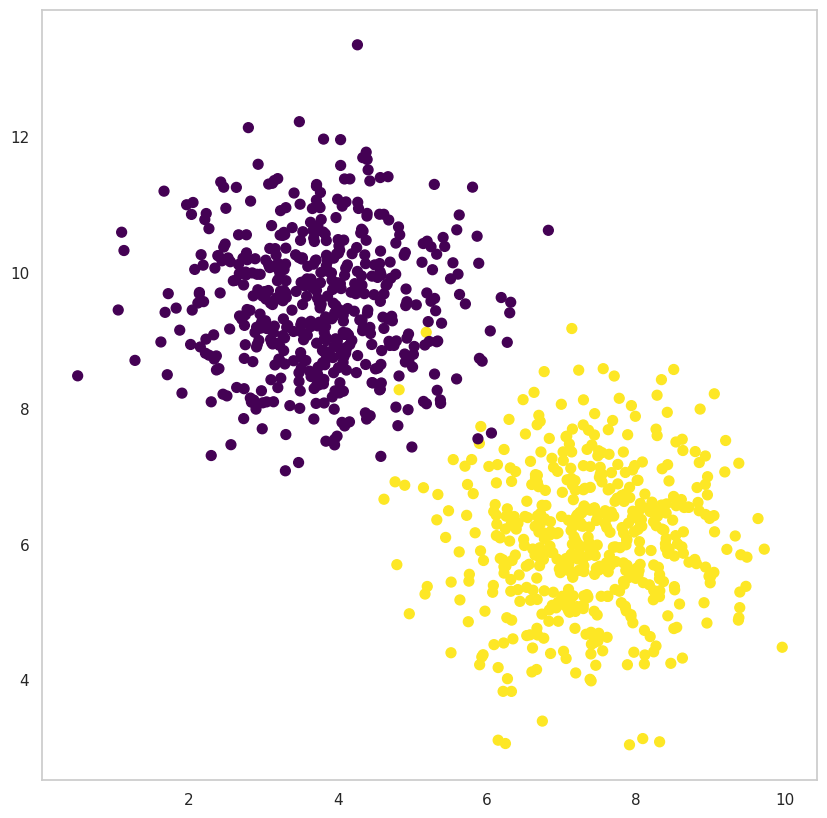

In [10]:
# Plot the data
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

### Augmentation of the input dataset

### Also, splits it into training and testing sets using the testTrainSplit function

In [11]:
# lets augument the data
X = np.c_[X, np.ones(X.shape[0])]
X_train, X_test, y_train, y_test = test_train_split_function(
    X, y, test_size=0.5)

### Running the perceptron algorithm for Model 1

In [12]:
weights, errors = perceptron(X_train, y_train, epochs=1000)

epoch:  0 error:  24
epoch:  10 error:  14
epoch:  20 error:  12
epoch:  30 error:  7
epoch:  40 error:  10
epoch:  50 error:  7
epoch:  60 error:  10
epoch:  70 error:  8
epoch:  80 error:  7
epoch:  90 error:  8
epoch:  100 error:  7
epoch:  110 error:  10
epoch:  120 error:  8
epoch:  130 error:  8
epoch:  140 error:  10
epoch:  150 error:  8
epoch:  160 error:  10
epoch:  170 error:  9
epoch:  180 error:  8
epoch:  190 error:  11
epoch:  200 error:  8
epoch:  210 error:  11
epoch:  220 error:  10
epoch:  230 error:  8
epoch:  240 error:  8
epoch:  250 error:  8
epoch:  260 error:  8
epoch:  270 error:  8
epoch:  280 error:  8
epoch:  290 error:  7
epoch:  300 error:  8
epoch:  310 error:  11
epoch:  320 error:  8
epoch:  330 error:  12
epoch:  340 error:  12
epoch:  350 error:  10
epoch:  360 error:  8
epoch:  370 error:  10
epoch:  380 error:  10
epoch:  390 error:  10
epoch:  400 error:  8
epoch:  410 error:  9
epoch:  420 error:  8
epoch:  430 error:  8
epoch:  440 error:  12
ep

### Accuracy: MODEL 1

#### Training Dataset Accuracy

In [13]:
final_weight = weights[-1]
accuracy = compute_accuracy(X_train, y_train, final_weight)
print("Train Accuracy for the Model 1: ", accuracy)


Train Accuracy for the Model 1:  0.946


#### Testing Dataset Accuracy

In [14]:
final_weight = weights[-1]
accuracy = compute_accuracy(X_test, y_test, final_weight)
print("Test Accuracy for Model 1: ", accuracy)

Test Accuracy for Model 1:  0.958


## MODEL 2: PERCEPTRON ALGORITHM

### Using the make circles function in sklearn generate a dataset of 100 points with two classes.

### Creating a Dataset of Intersecting Circles using Scikit-learn's make_circles() Function

In [15]:
X, y = datasets.make_circles(
    n_samples=1000, shuffle=True, noise=0.065, random_state=100, factor=0.6)

### Change the label for class 0 to -1

In [16]:
y[y == 0] = -1

### Visualize the generated data using scatter plot for Model 2

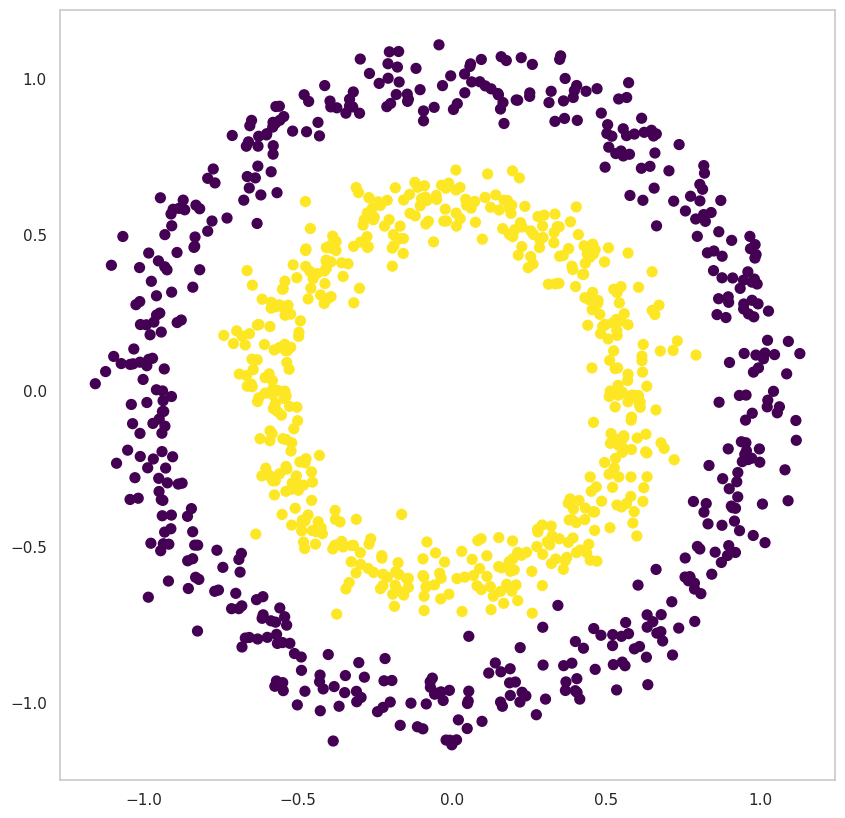

In [17]:
sns.set()
sns.set_style("whitegrid")
# set figure size
plt.figure(figsize=(10, 10))
# turn grid off
plt.grid(False)
# turn scale off
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.show()

### Adding Bias Term: Second Order 
### Augmenting the input feature matrix X with additional polynomial features of degree 2. 

In [18]:
# Add a column of ones to the beginning of X to represent the bias term
# and create an empty numpy array to hold the augmented features
X_aug = np.c_[np.ones(len(X)), X,

              # Append a column representing the square of the first feature
              X[:, 0] ** 2,

              # Append a column representing the square of the second feature
              X[:, 1] ** 2,

              # Append a column representing the product of the first and second features
              X[:, 0] * X[:, 1]]


In [19]:
X_train, X_test, y_train, y_test = test_train_split_function(X_aug, y, test_size=0.5)

print(X_test.shape)
print(X_train.shape)

(500, 6)
(500, 6)


### Running the perceptron algorithm for Model 2

In [20]:
weights, errors = perceptron(
    X_train, y_train, initial_weights=[-1, -1, -1, -1, -1, 0], learning_rate=0.1, epochs=5000)

epoch:  0 error:  38
epoch:  10 error:  6
epoch:  20 error:  5
epoch:  30 error:  8
epoch:  40 error:  4
epoch:  50 error:  2
epoch:  60 error:  2
epoch:  70 error:  4
epoch:  80 error:  4
epoch:  90 error:  4
epoch:  100 error:  4
epoch:  110 error:  2
epoch:  120 error:  2
epoch:  130 error:  4
epoch:  131 error:  0


### Accuracy: MODEL 2

#### Training Dataset Accuracy

In [22]:
final_weight = weights[-1]
accuracy = compute_accuracy(X_train, y_train, final_weight)
print("Train Accuracy: ", accuracy)

Train Accuracy:  1.0


#### Testing Dataset Accuracy

In [23]:
final_weight = weights[-1]
accuracy = compute_accuracy(X_test, y_test, final_weight)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.998
